Classify pigmented skin lesions dermatoscopic images from HAM10k https://www.nature.com/articles/sdata2018161 into 7 diagnosis


In [ ]:
# IMPORT MODULES
import sys
from os.path import join
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
#from tensorflow.python.keras.applications import ResNet50

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils, to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import ResNet50
from keras.models import Model,load_model
import itertools
from keras.applications.vgg16 import preprocess_input
import os
print(os.listdir("../"))

In [2]:
PATH = "../input/dermmel/DermMel/"
print(os.listdir(PATH))

['valid', 'train_sep', 'test']


In [3]:
# Check content of the dirs

PATHtrain = PATH + 'train_sep/'
print(len(os.listdir(PATHtrain)), " TRAIN Directories of photos")
Labels = os.listdir(PATHtrain)
sig = 0
for label in sorted(Labels):
    print(label,len(os.listdir(PATHtrain + label +'/')))
    sig = sig + len(os.listdir(PATHtrain + label +'/'))

print("Total TRAIN photos ", sig)
print("_"*50)

PATHvalid = PATH + 'valid/'
print(len(os.listdir(PATHvalid)), " VALID Directories of photos")
Labels = os.listdir(PATHvalid)
sig = 0
for label in sorted(Labels):
    print(label,len(os.listdir(PATHvalid + label +'/')))
    sig = sig + len(os.listdir(PATHvalid + label +'/'))

print("Total Validation photos ", sig)
print("_"*50)

PATHtest = PATH + 'test/'
print(len(os.listdir(PATHtest)), " TEST Directories of photos")
Labels = os.listdir(PATHtest)
sig = 0
for label in sorted(Labels):
    print(label,len(os.listdir(PATHtest + label +'/')))
    sig = sig + len(os.listdir(PATHtest + label +'/'))

print("Total Testing photos ", sig)
print("_"*50)

2  TRAIN Directories of photos
Melanoma 5341
NotMelanoma 5341
Total TRAIN photos  10682
__________________________________________________
2  VALID Directories of photos
Melanoma 1781
NotMelanoma 1781
Total Validation photos  3562
__________________________________________________
2  TEST Directories of photos
Melanoma 1781
NotMelanoma 1780
Total Testing photos  3561
__________________________________________________


TRAIN  Melanoma  photo number  8


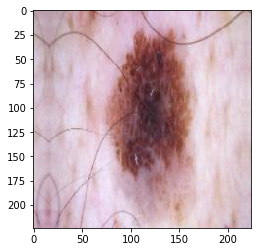

VALID  Melanoma  photo number  8


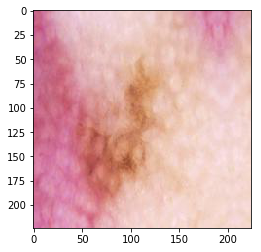

TEST  Melanoma  photo number  8


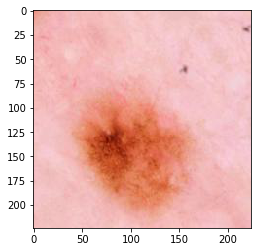

In [4]:
# Check the photos and their labels 

TestNum = 8
diag = 'Melanoma'

image_dir = PATHtrain +'/'+diag+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("TRAIN ",diag," photo number ", TestNum)
plt.show()

image_dir = PATHvalid +'/'+diag+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("VALID ",diag," photo number ", TestNum)
plt.show()

image_dir = PATHtest +'/'+diag+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("TEST ",diag," photo number ", TestNum)
plt.show()


In [5]:
# Convoluted Base MODEL

conv_base = ResNet50(weights='imagenet',
include_top=False,
input_shape=(224, 224, 3))

print(conv_base.summary())

/opt/conda/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________

In [6]:
# MODEL

model = models.Sequential()
model.add(conv_base)
model.add(Conv2D(512, kernel_size=(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D((3, 3),padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D((3, 3),padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D((3, 3),padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D((3, 3),padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dense(256, activation='sigmoid',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(2, activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 512)         9437696   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 512)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 512)         2359808   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 512)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 512)         2359808   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 512)        

In [7]:
# Make the conv_base NOT trainable:

for layer in conv_base.layers[:]:
    layer.trainable = False

print('conv_base is now NOT trainable')

conv_base is now NOT trainable


for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

In [8]:
# Compile frozen conv_base + my top layer

model.compile(optimizer=optimizers.Adam(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("model compiled")
print(model.summary())

model compiled
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 512)         9437696   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 512)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 512)         2359808   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 512)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 512)         2359808   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 

In [9]:
# Prep the Train Valid and Test directories for the generator

train_dir = PATHtrain
validation_dir = PATHvalid
test_dir = PATHtest
batch_size = 20
target_size=(224, 224)

#train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=target_size,batch_size=batch_size)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,target_size=target_size,batch_size=batch_size)
test_generator = test_datagen.flow_from_directory(
    test_dir,target_size=target_size,batch_size=batch_size)

Found 10682 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


In [10]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
reduce_learning_rate = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 3, verbose = 1, factor = 0.3, min_lr = 0.00001)
checkpoint = ModelCheckpoint('modelb.h5', monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 1e-10, patience = 10, verbose = 1, restore_best_weights = True)

callbacks = [reduce_learning_rate, checkpoint, early_stopping]

In [11]:
# Short training ONLY my top layers 
#... so the conv_base weights will not be destroyed by the random intialization of the new weights

history = model.fit_generator(train_generator,
                              epochs=100,
                              callbacks = callbacks,
                              steps_per_epoch = 10682 // batch_size,
                              validation_data = validation_generator,
                              validation_steps = 3562 // batch_size)

Epoch 1/100
534/534 [==============================] - 270s 505ms/step - loss: 1.3744 - accuracy: 0.9001 - val_loss: 5.1845 - val_accuracy: 0.5180

Epoch 00001: val_accuracy improved from -inf to 0.51798, saving model to modelb.h5
Epoch 2/100
534/534 [==============================] - 235s 439ms/step - loss: 0.4794 - accuracy: 0.9268 - val_loss: 0.6360 - val_accuracy: 0.9241

Epoch 00002: val_accuracy improved from 0.51798 to 0.92405, saving model to modelb.h5
Epoch 3/100
534/534 [==============================] - 229s 430ms/step - loss: 0.3267 - accuracy: 0.9263 - val_loss: 0.1401 - val_accuracy: 0.9413

Epoch 00003: val_accuracy improved from 0.92405 to 0.94128, saving model to modelb.h5
Epoch 4/100
534/534 [==============================] - 230s 430ms/step - loss: 0.2588 - accuracy: 0.9348 - val_loss: 0.3110 - val_accuracy: 0.9483

Epoch 00004: val_accuracy improved from 0.94128 to 0.94833, saving model to modelb.h5
Epoch 5/100
534/534 [==============================] - 228s 426ms/s

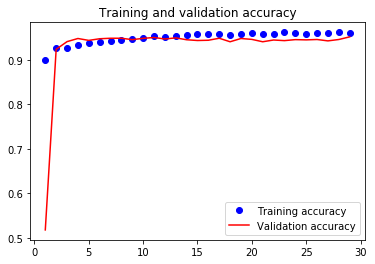

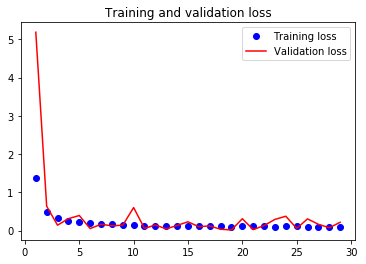

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
test_generator = test_datagen.flow_from_directory(
    test_dir,target_size=target_size,batch_size=1)
model=load_model('modelb.h5')
test_loss, test_acc = model.evaluate_generator(test_generator, steps= 3561 // 1, verbose=1)
print('test acc:', test_acc)

Found 3561 images belonging to 2 classes.
3561/3561 [==============================] - 66s 18ms/step
test acc: 0.944959282875061


In [14]:
pred=model.predict_generator(test_generator, steps= 3561 , verbose=1)

3561/3561 [==============================] - 63s 18ms/step


In [15]:
y=[test_generator[i][1] for i in range(0,3561)]
pred = (pred >0.5)*1

In [16]:
pred=np.array(pred)
y=np.array(y)

In [17]:
c=0
a=3561
ycon=[0 for i in range(0,a)]
pcon=[0 for i in range(0,a)]
for i in range(0,a):
    if(pred[i][0]!=y[i][0][0]):
        c=c+1
    ycon[i]=y[i][0][0]
    pcon[i]=pred[i][0]
print((a-c)/a)

0.9449592811008144


In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

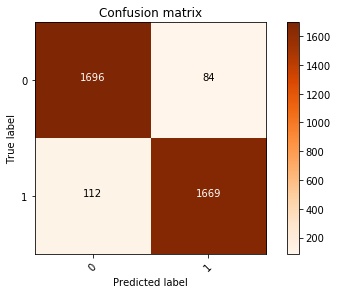

In [19]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(ycon, pcon)
plot_confusion_matrix(confusion_mtx, classes = range(2))

In [20]:
tp=0
tn=0
fp=0
fn=0
for i in range(0,3561):
    if(ycon[i]==0 and pcon[i]==0):
        tp=tp+1
    if(ycon[i]==1 and pcon[i]==0):
        fp=fp+1
    if(ycon[i]==0 and pcon[i]==1):
        fn=fn+1
    if(ycon[i]==1 and pcon[i]==1):
        tn=tn+1
    

In [21]:
acc=(a-c)/a
pre=tp/(tp+fp)
rec=tp/(tp+fn)
spe=tn/(tn+fp)
f1=2*((pre*rec)/(pre+rec))
print("accuracy:    "+ str(acc))
print("")
print("precision:   "+str(pre))
print("")
print("F1:          "+str(f1))
print("")
print("sensitivity: "+str(rec))
print("")
print("specificity: "+str(spe))


accuracy:    0.9449592811008144

precision:   0.9380530973451328

F1:          0.9453734671125975

sensitivity: 0.952808988764045

specificity: 0.9371139809096013


In [22]:
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import cv2

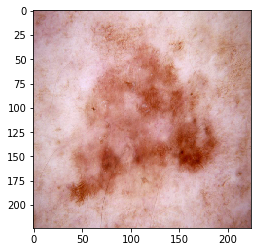

In [23]:
img_path = "../input/dermmel/DermMel/valid/Melanoma/ISIC_0029094.jpg"
img1 = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img1)

x = img_to_array(img1)
x=x/255
x = np.expand_dims(x, axis=0)

In [24]:
preds = model.predict(x)

In [25]:
np.argmax(preds)

0

In [26]:
np.seterr(divide='ignore', invalid='ignore')

tiger_output = model.output[:, np.argmax(preds)]
last_conv_layer = model.get_layer("conv2d_2")

grads = K.gradients(tiger_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis=-1)

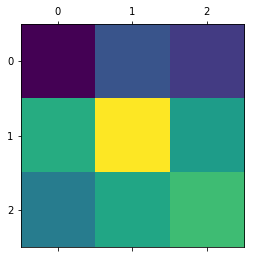

In [27]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()


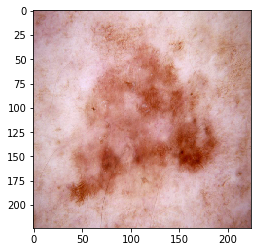

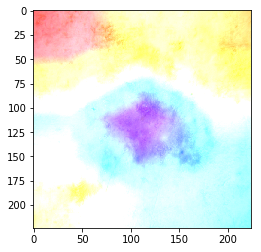

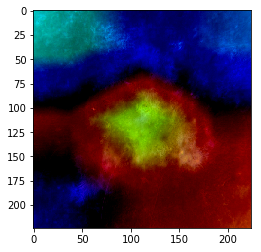

In [28]:
import cv2
heatmap = cv2.resize(heatmap, (x.shape[1], x.shape[1]))

heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)


img = load_img('../input/dermmel/DermMel/valid/Melanoma/ISIC_0029094.jpg', target_size=(224, 224))
img=np.array(img)
heatmap=heatmap*1
superimposed_img =  img/255 + heatmap/255
plt.imshow(img)
plt.show()
plt.imshow(superimposed_img)
plt.show()

plt.imshow(1.2-superimposed_img)
plt.show()

In [29]:
# SAVE or LOAD model (Keras - all batteries included: architecture, weights, optimizer, last status in training, etc.)
# YOU supply this model.h5 file from previous training session(s) - expected as a data source by Kaggle

# SAVE model
model.save('Melanoma-v20.h5')
print("Melanoma-v20.h5 was saved")
#model = load_model('../input/weather-v9/modelWeatherV10.h5')
#print("modelWeatherV10.h5 was loaded")

Melanoma-v20.h5 was saved
